In [107]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Pacejka Magic Formula

In [108]:
def _lat_pacejka(inclination_angle:float, normal_force:float, slip_angle:float, lat_coeffs: list[float], tire_scaling: float):

    if normal_force == 0:
        return 0
    
    FZ = normal_force
    IA = inclination_angle * 180 / math.pi
    SA = slip_angle * 180 / math.pi

    [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17] = lat_coeffs

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return tire_scaling * D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

### Plotting

In [109]:
def plot(normal_force):
    params = [0.349, -0.00115, 8.76, 730, 1750, 0.0139, -0.000277, 1.02, 0.000158, 0.149, -0.159, 0.0329, 9.15, 0.0000141, 0.0328,  0.00362, -0.0143, -0.0116]

    FZ = normal_force
    SA = np.linspace(-20 * np.pi / 180, 20 * np.pi / 180, 100)
    IA = 0
    tire_scaling = 0.55

    lat_force = []
    for SA_val in SA:
        output = _lat_pacejka(IA, FZ, SA_val, params, tire_scaling)
        lat_force.append(output)

    plt.plot(SA, lat_force)

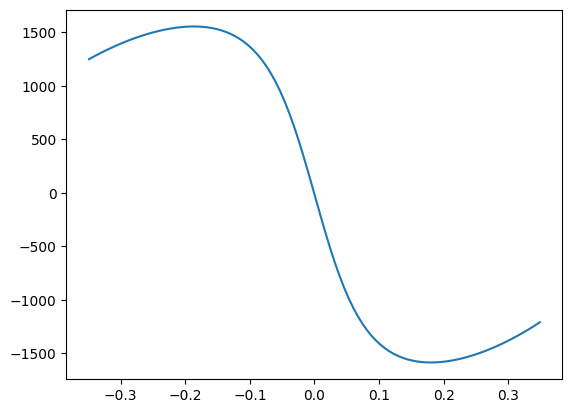

In [111]:
# Enter force in N here
plot(-1200)